<a href="https://colab.research.google.com/github/preciousNliwasa/ACIOUS-1/blob/master/Nliwasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,Activation

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
import matplotlib.pyplot as plt

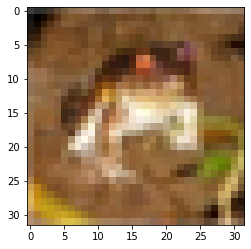

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

array([6], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

In [18]:
y_train_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_train_en[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
model = Sequential()


model.add(Conv2D(32,(5,5),input_shape = (32,32,3),activation="relu" ))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


model.add(Dense(1000,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

In [0]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [25]:
p = model.fit(x_train,y_train_en,batch_size=256,epochs = 10,validation_split = 0.3)

Epoch 1/10
137/137 [==============================] - 48s 351ms/step - loss: 1.6798 - accuracy: 0.3879 - val_loss: 1.4580 - val_accuracy: 0.4745
Epoch 2/10
137/137 [==============================] - 48s 351ms/step - loss: 1.3579 - accuracy: 0.5126 - val_loss: 1.3597 - val_accuracy: 0.5109
Epoch 3/10
137/137 [==============================] - 48s 351ms/step - loss: 1.2237 - accuracy: 0.5639 - val_loss: 1.1927 - val_accuracy: 0.5803
Epoch 4/10
137/137 [==============================] - 48s 349ms/step - loss: 1.1428 - accuracy: 0.5962 - val_loss: 1.1484 - val_accuracy: 0.5947
Epoch 5/10
137/137 [==============================] - 48s 350ms/step - loss: 1.0415 - accuracy: 0.6331 - val_loss: 1.0947 - val_accuracy: 0.6206
Epoch 6/10
137/137 [==============================] - 48s 350ms/step - loss: 0.9900 - accuracy: 0.6515 - val_loss: 1.1184 - val_accuracy: 0.6100
Epoch 7/10
137/137 [==============================] - 48s 349ms/step - loss: 0.9185 - accuracy: 0.6796 - val_loss: 1.0315 - val_ac

In [27]:
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat33.jpg')

Saving cat33.jpg to cat33.jpg


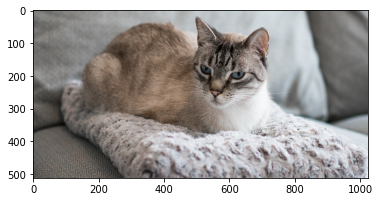

In [28]:
plt.imshow(my_image)

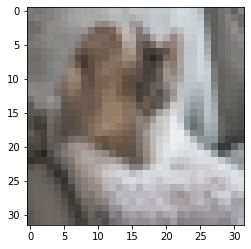

In [29]:
from skimage.transform import resize

my_image_resized = resize(my_image,(32,32,3))
imag = plt.imshow(my_image_resized)

In [30]:
import numpy as np
probabilities = model.predict( np.array([my_image_resized,]))
probabilities

array([[6.1312708e-04, 7.6523875e-06, 1.1029259e-02, 7.9048288e-01,
        5.6471955e-04, 1.8925431e-01, 3.7088760e-03, 1.7193310e-03,
        2.4677394e-03, 1.5214708e-04]], dtype=float32)